<a href="https://colab.research.google.com/github/waveology/aire/blob/main/5_analisis_multivariante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis multivariante

Vamos a explorar algunas posibilidades de análisis de datos de calidad del aire que ofrece Python. Usaremos como hasta ahora datos meteorológicos de AEMET y de contaminación de la Comunidad de Madrid.

###1. Copia del repositorio de datos
---

Descargamos el repositorio de código y datos para trabajar más cómodamente:

In [ ]:
# Directorio de trabajo en Colab 
# ------------------------------------------------------------
%cd /content

# Si existe una copia previa del repositorio, la borramos:
# ----------------------------------------------------------------------------
#!  rm -rf aire

# Creamos una copia del repositorio SOLO si no existe previamente
# ----------------------------------------------------------------------------
! [ ! -d aire ] && git clone https://github.com/waveology/aire.git

# Entramos en el repositorio que acabamos de copiar
# --------------------------------------------------
%cd aire

/content
Cloning into 'aire'...
remote: Enumerating objects: 225, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 225 (delta 86), reused 131 (delta 82), pack-reused 82
Receiving objects: 100% (225/225), 19.57 MiB | 12.16 MiB/s, done.
Resolving deltas: 100% (124/124), done.
/content/aire


Importamos las extensiones que vamos a necesitar. 

Para simplificar la tarea hemos empaquetado las funciones de lectura de datos en un fichero independiente (lectura_de_datos.py) 

In [ ]:
import lectura_de_datos                                   # lee ficheros de datos meteorológicos y de contaminación de Madrid
import matplotlib.pyplot as plt                           # dibujo de gráficos
from matplotlib.dates import MonthLocator, DateFormatter  # formato de fechas 
from scipy import stats                                   # cálculo estadístico
import numpy as np                                        # matrices
import pandas as pd                                       # dataframes
import seaborn as sns

###2. Inventario de magnitudes
---

####Estaciones de medida
**Código | Municipio | Nombre**

---
*       28005002   :    (  5,  'ALCALÁ DE HENARES'), 
*       28006004   :    (  6,  'ALCOBENDAS'), 
*       28007004   :    (  7,  'ALCORCÓN'), 
*       28009001   :	(  9,  'ALGETE'), 
*       28013002   :	( 13,  'ARANJUEZ'), 
*       28014002   :	( 14,  'ARGANDA DEL REY'),
*       28016001   :	( 16,  'EL ATAZAR'),
*       28045002   :	( 45,  'COLMENAR VIEJO'), 
*       28047002   :	( 47,  'COLLADO VILLALBA'), 
*       28049003   :	( 49,  'COSLADA'), 
*       28058004   :	( 58,  'FUENLABRADA'), 
*       28065014   :	( 65,  'GETAFE'), 
*       28067001   :	( 67,  'GUADALIX DE LA SIERRA'), 
*       28074007   :	( 74,  'LEGANÉS'), 
*       28080003   :	( 80,  'MAJADAHONDA'), 
*       28092005   :	( 92,  'MÓSTOLES'), 
*       28102001   :	(102,  'ORUSCO DE TAJUÑA'), 
*       28120001   : 	(120,  'PUERTO DE COTOS'), 
*       28123002   :	(123,  'RIVAS-VACIAMADRID'), 
*       28133002   :	(133,  'SAN MARTÍN DE VALDEIGLESIAS'), 
*       28148004   :	(148,  'TORREJÓN DE ARDOZ'), 
*       28161001   :	(161,  'VALDEMORO'), 
*       28171001   :	(171,  'VILLA DEL PRADO'), 
*       28180001   :	(180,  'VILLAREJO DE SALVANÉS')


####Contaminantes
**Código  |  Magnitud  | Unidades**

  
---
*      1 	:  ('Dióxido de azufre', 'μg/m³'),
*      6 	:  ('Monóxido de carbono', 'mg/m³'),
*      7 	:  ('Monóxido de nitrógeno', 'μg/m³'),
*      8 	:  ('Dióxido de nitrógeno', 'μg/m³'),
*      9 	:  ('Partículas en suspensión < PM2.5', 'μg/m³'),
*     10 	:  ('Partículas en suspensión < PM10',  'μg/m³'),
*     12 	:  ('Óxidos de nitrógeno', 'μg/m³'),
*     14 	:  ('Ozono', 'μg/m³'),
*     20 	:  ('Tolueno', 'μg/m³'),
*     22 	:  ('Black Carbon', 'μg/m³'),
*     30 	:  ('Benceno', 'μg/m³'),
*     42 	:  ('Hidrocarburos totales', 'mg/m³'),
*     44 	:  ('Hidrocarburos no metánicos', 'mg/m³'),
*    431  :  ('MetaParaXileno', 'μg/m³')
    }

####Meteorología
**Código | Magnitud | Unidades**

---
*   81 :	('Velocidad del viento',     'm/s'), 
*   82 :	('Dirección del viento',     'º'), 
*   83 :	('Temperatura',              'ºC'), 
*   86 :	('Humedad relativa',         '%'), 
*   87 :	('Presión atmosférica',      'hPa'), 
*   88 :	('Radiación solar',          'W/m2'), 
*   89 :	('Precipitación',            'mm')

###3. Carga de datos
---

Vamos a cargar datos de dos magnitudes para estudiar posibles relaciones:


In [ ]:
# Ejemplo con datos de contaminación
# ----------------------------------
anio = 2021
col1 = 'pm2.5'
col2 = 'pm10'
col3 = 'black_carbon'

df1, magnitud1, unidades1, estacion = lectura_de_datos.comunidad(
                                    'datos/comunidad/%s.csv' % anio,
                                     codigo_magnitud = 9,          # PM2.5
                                     codigo_estacion = 28065014    # Getafe
                                     ) 
df2, magnitud2, unidades2, estacion = lectura_de_datos.comunidad(
                                    'datos/comunidad/%s.csv' % anio,
                                     codigo_magnitud = 10 ,        # PM10
                                     codigo_estacion = 28065014    # Getafe
                                     ) 
df3, magnitud2, unidades2, estacion = lectura_de_datos.comunidad(
                                    'datos/comunidad/%s.csv' % anio,
                                     codigo_magnitud = 22 ,        # Black carbon
                                     codigo_estacion = 28065014    # Getafe
                                     ) 

# Asignamos un nombre significativo a la columna 'valor'
# -------------------------------------------------------
df1.rename(columns={'valor':col1}, inplace=True)
df2.rename(columns={'valor':col2}, inplace=True)
df3.rename(columns={'valor':col3}, inplace=True)

# Fusionamos ambas series de datos en un mismo dataframe
# --------------------------------------------------------
df = pd.merge(df1, df2, left_index=True, right_index=True)
df.merge

print(df.describe())

 -Info: encontrados datos de 365 días
 -Info: encontrados datos de 365 días
 -Info: encontrados datos de 0 días


TypeError: ignored

###4. Matriz de dispersión
---

Echamos un vistazo a ambas series temporales:

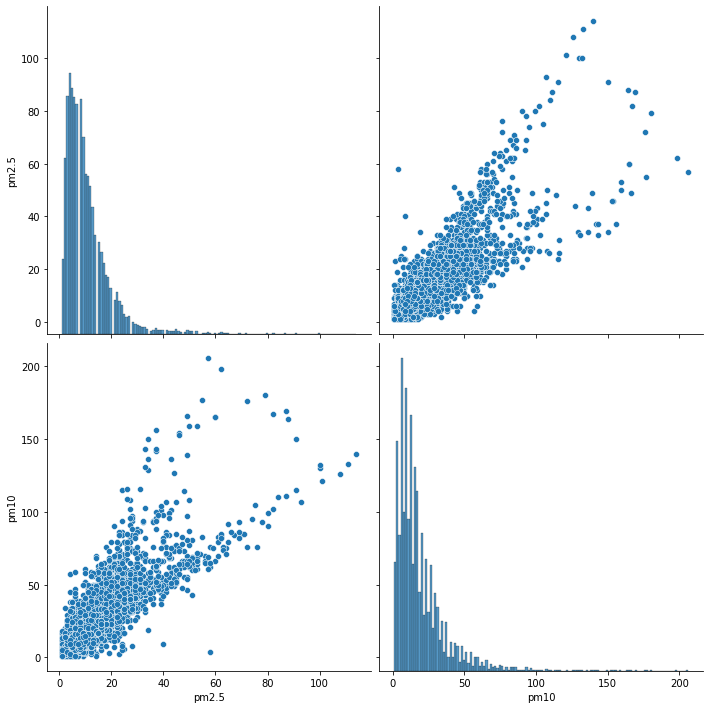

In [ ]:
sns.pairplot(df, height=5)
plt.show()